# PREDICTION WITH XGBRegressor

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error 
from xgboost import XGBRegressor
 

In [26]:
# read dataset may2023
df = pd.read_pickle("../../data/20230319_RTU_Dataset_PPC-Lab/df1.pkl")  

In [27]:
df

,MEM_USAGE,CPU_USAGE,TEMP
time,,,
2023-01-30 12:11:56.788,35.555417,27.343750,28.687
2023-01-30 12:16:57.191,35.555417,6.367041,28.687
2023-01-30 12:21:57.606,35.555417,7.142857,28.687
2023-01-30 12:26:58.001,35.555417,27.306273,28.687
2023-01-30 12:31:58.396,35.555417,5.639098,28.687
...,...,...,...
2023-02-09 16:53:01.209,24.758905,72.426471,32.000
2023-02-09 16:58:02.548,24.758905,22.556391,23.750
2023-02-09 17:03:03.007,24.758905,8.267717,23.750


In [28]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [29]:
training_size = int(len(df) * 0.7)
validation_size = int(len(df) * 0.8)

x_train = [[i] for i in df["TEMP"]][:training_size]
y_train = [i for i in df["CPU_USAGE"]][:training_size]

x_val = [[i] for i in df["TEMP"]][training_size:validation_size]
y_val = [i for i in df["CPU_USAGE"]][training_size:validation_size]

x_test = [[i] for i in df["TEMP"]][validation_size:]
y_test = [[i] for i in df["CPU_USAGE"]][validation_size:]

len(x_test)


556

In [30]:
# Training
regressor = XGBRegressor(
    max_depth=12,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42)

In [31]:
regressor.fit(
    x_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(x_train, y_train), (x_val, y_val)], 
    verbose=True, 
    early_stopping_rounds = 20)

[0]	validation_0-rmse:16.30249	validation_1-rmse:16.20593
[1]	validation_0-rmse:15.43262	validation_1-rmse:15.30433
[2]	validation_0-rmse:14.68283	validation_1-rmse:14.49151
[3]	validation_0-rmse:14.06280	validation_1-rmse:13.82416
[4]	validation_0-rmse:13.53370	validation_1-rmse:13.27977
[5]	validation_0-rmse:13.08153	validation_1-rmse:12.79620
[6]	validation_0-rmse:12.70574	validation_1-rmse:12.41775
[7]	validation_0-rmse:12.40990	validation_1-rmse:12.13272
[8]	validation_0-rmse:12.15947	validation_1-rmse:11.87865
[9]	validation_0-rmse:11.95388	validation_1-rmse:11.66540
[10]	validation_0-rmse:11.78063	validation_1-rmse:11.47309
[11]	validation_0-rmse:11.63506	validation_1-rmse:11.31297
[12]	validation_0-rmse:11.51260	validation_1-rmse:11.18862
[13]	validation_0-rmse:11.41679	validation_1-rmse:11.09271
[14]	validation_0-rmse:11.33180	validation_1-rmse:11.00117
[15]	validation_0-rmse:11.26641	validation_1-rmse:10.93408
[16]	validation_0-rmse:11.21474	validation_1-rmse:10.89072
[17]	va

/home/matteo/anaconda3/envs/terminet/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/matteo/anaconda3/envs/terminet/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-rmse:10.98028	validation_1-rmse:10.69377
[51]	validation_0-rmse:10.98018	validation_1-rmse:10.69487


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=0.5, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [32]:
Y_pred = regressor.predict(x_test)

In [33]:
print(mean_absolute_percentage_error(list(Y_pred), y_test))

61.53672897660558


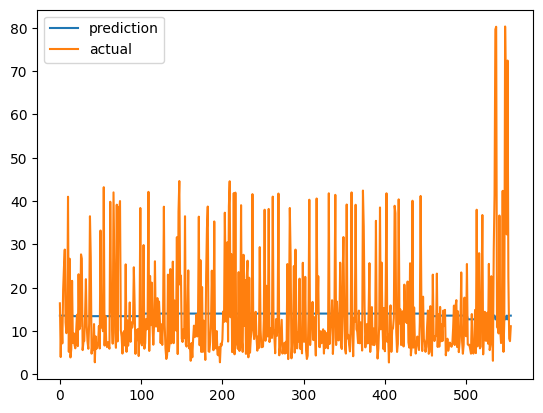

In [34]:
import matplotlib.pyplot as plt
import numpy as np

x = range(len(list(Y_pred)))
y_pred = list(Y_pred)
y_actual = y_test

plt.plot(x, y_pred, label="prediction")
plt.plot(x, y_actual, label="actual")
plt.legend()
plt.show()

In [35]:
training_size = int(len(df) * 0.7)
validation_size = int(len(df) * 0.8)

x_train = [[i] for i in df["CPU_USAGE"]][:training_size]
y_train = [i for i in df["TEMP"]][:training_size]

x_val = [[i] for i in df["CPU_USAGE"]][training_size:validation_size]
y_val = [i for i in df["TEMP"]][training_size:validation_size]

x_test = [[i] for i in df["CPU_USAGE"]][validation_size:]
y_test = [[i] for i in df["TEMP"]][validation_size:]

In [36]:
# Training
regressor = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42)

regressor.fit(
    x_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(x_train, y_train), (x_val, y_val)], 
    verbose=True, 
    early_stopping_rounds = 20)

[0]	validation_0-rmse:22.97986	validation_1-rmse:19.38365
[1]	validation_0-rmse:20.71502	validation_1-rmse:17.12292
[2]	validation_0-rmse:18.67496	validation_1-rmse:15.08839
[3]	validation_0-rmse:16.83991	validation_1-rmse:13.26074
[4]	validation_0-rmse:15.19993	validation_1-rmse:11.63060
[5]	validation_0-rmse:13.72437	validation_1-rmse:10.16815
[6]	validation_0-rmse:12.40304	validation_1-rmse:8.86850
[7]	validation_0-rmse:11.22033	validation_1-rmse:7.70879
[8]	validation_0-rmse:10.16297	validation_1-rmse:6.68566
[9]	validation_0-rmse:9.21483	validation_1-rmse:5.77817
[10]	validation_0-rmse:8.36878	validation_1-rmse:4.99373
[11]	validation_0-rmse:7.61396	validation_1-rmse:4.31110
[12]	validation_0-rmse:6.94134	validation_1-rmse:3.73777
[13]	validation_0-rmse:6.34547	validation_1-rmse:3.27045
[14]	validation_0-rmse:5.81712	validation_1-rmse:2.90670
[15]	validation_0-rmse:5.35366	validation_1-rmse:2.64713
[16]	validation_0-rmse:4.93936	validation_1-rmse:2.48615
[17]	validation_0-rmse:4.5

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=0.5, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [37]:
Y_pred = regressor.predict(x_test)

In [42]:
print(mean_absolute_percentage_error(y_test, Y_pred))

9.568646302845202


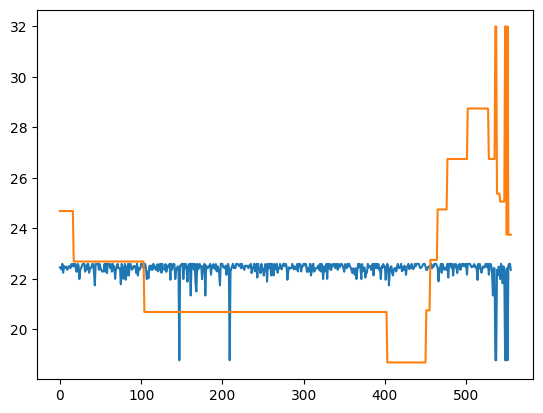

In [43]:
import matplotlib.pyplot as plt
import numpy as np

x = range(len(list(Y_pred)))
y_pred = list(Y_pred)
y_actual = y_test

plt.plot(x, y_pred)
plt.plot(x, y_actual)
plt.show()

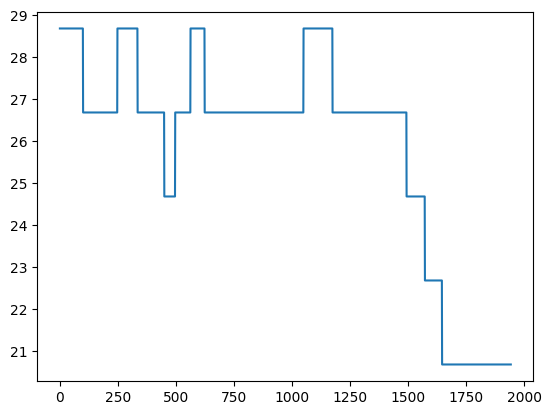

In [44]:
x = range(len(list(y_train)))
y_pred = list(y_train)

plt.plot(x, y_pred)
plt.show()